In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv", low_memory=False)

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,6/12/2008,11:41:00,4.278,0.428,236.78,18.6,33,0,18.0
1,6/12/2008,11:42:00,2.544,0.454,239.01,10.8,1,0,17.0
2,6/12/2008,11:43:00,2.612,0.444,238.18,11,1,0,17.0
3,6/12/2008,11:44:00,3.584,0.438,237.22,15.8,14,1,18.0
4,6/12/2008,11:45:00,4.79,0.42,236.16,20.2,38,0,17.0


In [4]:
df.replace('?',pd.NA, inplace=True)
df=df.dropna()

In [5]:
cols = df.columns.drop(['Date','Time'])
df[cols]=df[cols].astype(float)

In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,6/12/2008,11:41:00,4.278,0.428,236.78,18.6,33.0,0.0,18.0
1,6/12/2008,11:42:00,2.544,0.454,239.01,10.8,1.0,0.0,17.0
2,6/12/2008,11:43:00,2.612,0.444,238.18,11.0,1.0,0.0,17.0
3,6/12/2008,11:44:00,3.584,0.438,237.22,15.8,14.0,1.0,18.0
4,6/12/2008,11:45:00,4.790,0.420,236.16,20.2,38.0,0.0,17.0


In [7]:
df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

df.drop(['Date','Time'], axis=1, inplace=True)

In [8]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.278,0.428,236.78,18.6,33.0,0.0,18.0,2008-12-06 11:41:00
1,2.544,0.454,239.01,10.8,1.0,0.0,17.0,2008-12-06 11:42:00
2,2.612,0.444,238.18,11.0,1.0,0.0,17.0,2008-12-06 11:43:00
3,3.584,0.438,237.22,15.8,14.0,1.0,18.0,2008-12-06 11:44:00
4,4.790,0.420,236.16,20.2,38.0,0.0,17.0,2008-12-06 11:45:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10608 entries, 0 to 10677
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Global_active_power    10608 non-null  float64       
 1   Global_reactive_power  10608 non-null  float64       
 2   Voltage                10608 non-null  float64       
 3   Global_intensity       10608 non-null  float64       
 4   Sub_metering_1         10608 non-null  float64       
 5   Sub_metering_2         10608 non-null  float64       
 6   Sub_metering_3         10608 non-null  float64       
 7   Datetime               10608 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 745.9 KB


In [10]:
cols = ['Datetime'] + [col for col in df.columns if col != 'Datetime']
df = df[cols]


In [11]:
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2008-12-06 11:41:00,4.278,0.428,236.78,18.6,33.0,0.0,18.0
1,2008-12-06 11:42:00,2.544,0.454,239.01,10.8,1.0,0.0,17.0
2,2008-12-06 11:43:00,2.612,0.444,238.18,11.0,1.0,0.0,17.0
3,2008-12-06 11:44:00,3.584,0.438,237.22,15.8,14.0,1.0,18.0
4,2008-12-06 11:45:00,4.790,0.420,236.16,20.2,38.0,0.0,17.0


In [12]:
df['hour']=df['Datetime'].dt.hour
df['day']=df['Datetime'].dt.day
df['month']=df['Datetime'].dt.month
df['dayofweek']=df['Datetime'].dt.dayofweek

In [13]:
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,dayofweek
0,2008-12-06 11:41:00,4.278,0.428,236.78,18.6,33.0,0.0,18.0,11,6,12,5
1,2008-12-06 11:42:00,2.544,0.454,239.01,10.8,1.0,0.0,17.0,11,6,12,5
2,2008-12-06 11:43:00,2.612,0.444,238.18,11.0,1.0,0.0,17.0,11,6,12,5
3,2008-12-06 11:44:00,3.584,0.438,237.22,15.8,14.0,1.0,18.0,11,6,12,5
4,2008-12-06 11:45:00,4.790,0.420,236.16,20.2,38.0,0.0,17.0,11,6,12,5


In [14]:
y=df['Global_active_power']

In [15]:
x = df[['Voltage',
        'Sub_metering_1',
        'Sub_metering_2',
        'Sub_metering_3',
        'hour',
        'dayofweek']]

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

pred_lr=model_lr.predict(x_test)

In [18]:
from sklearn.ensemble import RandomForestRegressor

model_rf=RandomForestRegressor(n_estimators=100)
model_rf.fit(x_train,y_train)

pred_rf=model_rf.predict(x_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))
print("R2:", r2_score(y_test, pred_rf))
print("Train R2:", model_rf.score(x_train, y_train))
print("Test R2:", model_rf.score(x_test, y_test))

Random Forest Performance:
MAE: 0.17144740749592333
RMSE: 0.33505131875152877
R2: 0.9152258031498263
Train R2: 0.9878875880753641
Test R2: 0.9152258031498263


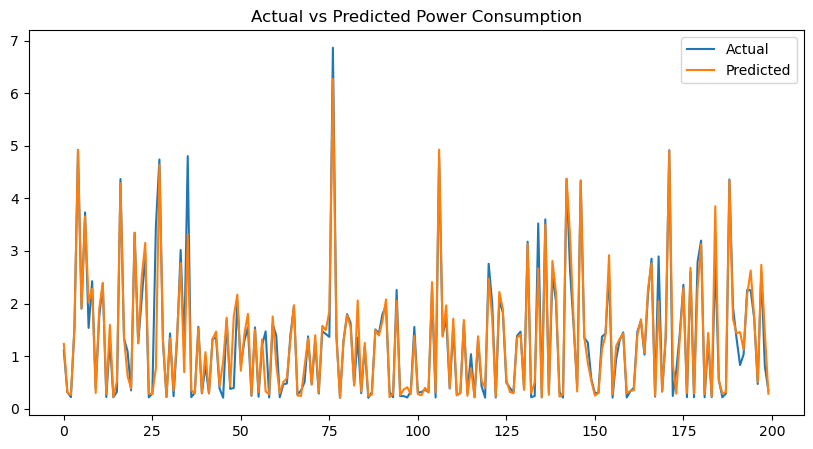

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(pred_rf[:200], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Power Consumption")
plt.show()

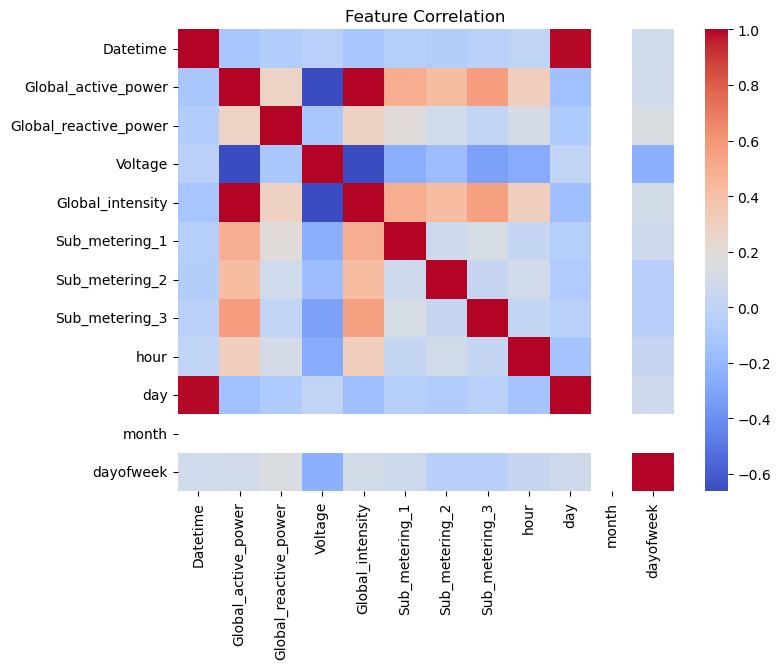

In [21]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [22]:
import pickle
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

with open('linear_model.pkl','wb') as f:
    pickle.dump(model_lr,f)

print("Model saved successfully")

Model saved successfully


Model loaded successfully


In [24]:
print(model.n_features_in_)

6
